In [55]:
def compute_bias(HNP_instance, guess, prime):
    CC = ComplexField(100)
    pi = CC.pi()
    I = CC.gen()
    
    bias = 0 * I
    for i in range(len(HNP_instance)):
        bias += exp(2*pi*I*(HNP_instance[i][0]*guess + HNP_instance[i][1])/prime)

    bias = bias / len(HNP_instance)
    return abs(bias)


/tmp/ipykernel_16356/2785902032.py:11: DeprecationWarning: the default rounding for rationals, currently `away`, will be changed to `even`.
See https://github.com/sagemath/sage/issues/35473 for details.
  k = randrange(-round(bound), floor(bound))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

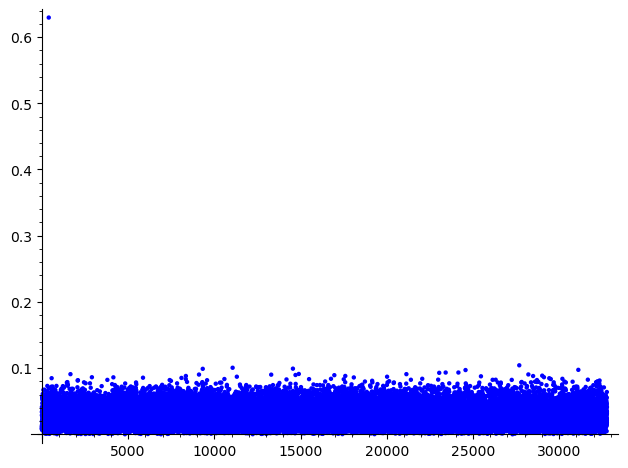

0.62953613537302345355238184793


In [ ]:
#bias bruteforce graph

LEAK_SIZE = 1
NUMBER_OF_SIGNATURES = 1000

prime = 32771
bound = (prime-1) / 2**(LEAK_SIZE+1)
bound = 1000
key = 400
HNP_instance = []

for j in range(NUMBER_OF_SIGNATURES):
    c = randrange(1, prime)
    k = randrange(-round(bound), floor(bound))
    h = (k - c*key) % prime
    HNP_instance.append((c, h))


compute_bias(HNP_instance, 50, prime)


x_values = [k for k in range(0, prime)]
y_values = [compute_bias(HNP_instance, x, prime) for x in x_values]
p = list_plot(list(zip(x_values, y_values)))
show(p)

/tmp/ipykernel_9607/4056731140.py:18: DeprecationWarning: the default rounding for rationals, currently `away`, will be changed to `even`.
See https://github.com/sagemath/sage/issues/35473 for details.
  k = randrange(-round(nonce_bound), floor(nonce_bound))


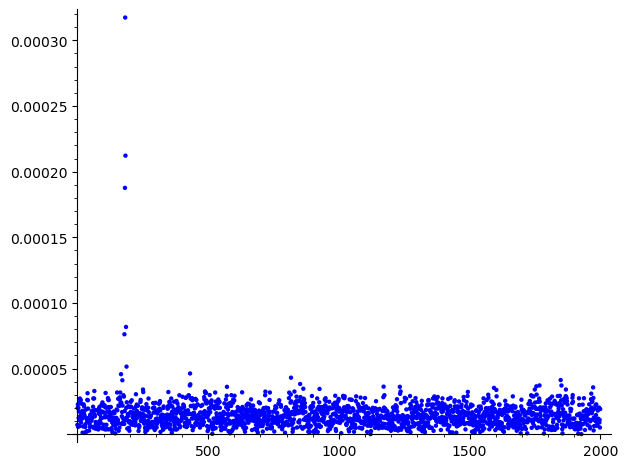

Maximum Value: (0.0003157242615656361-3.212979071066908e-05j)
Index of Maximum Value: [183]
we are looking for the number:  [2998.5465]


In [ ]:
import numpy

LEAK_SIZE = 1
NUMBER_OF_SIGNATURES = 1000

CC = ComplexField(100)
pi = CC.pi()
I = CC.gen()

prime = 32771
nonce_bound = (prime-1) / 2**(LEAK_SIZE+1)
c_bound = 1000
key = 3000
HNP_instance = []
#h = k -c *key


for j in range(NUMBER_OF_SIGNATURES):
    c = randrange(1, c_bound)
    k = randrange(-round(nonce_bound), floor(nonce_bound))
    h = (k - c*key) % prime
    HNP_instance.append((c, h))

n = 2*c_bound
z = [0] * n

for i in range(NUMBER_OF_SIGNATURES):
    z[HNP_instance[i][0]] += (1/NUMBER_OF_SIGNATURES) * exp(2*pi*I* HNP_instance[i][1]/prime)

X = numpy.fft.ifft(z)


x_values = [k for k in range(0, len(X))]
y_values = [abs(X[x]) for x in x_values]

p = list_plot(list(zip(x_values, y_values)))
show(p)

max_val = max(X)
max_indices = numpy.where(X == max_val)[0]

print("Maximum Value:", max_val)
print("Index of Maximum Value:", max_indices)
print("we are looking for the number: ", max_indices*prime/n)

In [34]:
#range reduction

import numpy

LEAK_SIZE = 1
NUMBER_OF_SIGNATURES = 1000

CC = ComplexField(100)
pi = CC.pi()
I = CC.gen()

prime = 32771
nonce_bound = (prime-1) / 2**(LEAK_SIZE+1)
key = 3000
HNP_instance = []

for j in range(NUMBER_OF_SIGNATURES):
    c = randrange(1, prime)
    k = randrange(-round(nonce_bound), floor(nonce_bound))
    h = (k - c*key) % prime
    HNP_instance.append((c, h))

#sort and difference
ITERATIONS = 5
for i in range(ITERATIONS):
    HNP_instance.sort(key=lambda x:x[1])
    helper_list = []
    for j in range(len(HNP_instance)-1):
        helper_list.append(((HNP_instance[j+1][0]-HNP_instance[j][0]) % prime,(HNP_instance[j+1][1]-HNP_instance[j][1]) % prime))
    HNP_instance = helper_list

print(helper_list)

/tmp/ipykernel_9607/1845243055.py:19: DeprecationWarning: the default rounding for rationals, currently `away`, will be changed to `even`.
See https://github.com/sagemath/sage/issues/35473 for details.
  k = randrange(-round(nonce_bound), floor(nonce_bound))


[(14729, 0), (5459, 0), (28584, 0), (14307, 0), (18460, 0), (980, 0), (21042, 0), (27737, 0), (24216, 0), (756, 0), (21981, 0), (12421, 0), (23210, 0), (25698, 0), (27384, 0), (11549, 0), (13349, 0), (31995, 0), (10439, 0), (4827, 0), (32654, 0), (13723, 0), (6141, 0), (11071, 0), (23890, 0), (847, 0), (7808, 0), (7739, 0), (1260, 0), (11582, 0), (5073, 0), (6988, 0), (28044, 0), (19024, 0), (21141, 0), (23828, 0), (27494, 0), (16098, 0), (13172, 0), (15324, 0), (17251, 0), (15471, 0), (1860, 0), (18631, 0), (9801, 0), (22454, 0), (28129, 0), (31819, 0), (12377, 0), (32756, 0), (19956, 0), (4150, 0), (23236, 0), (17142, 0), (24137, 0), (4525, 0), (31526, 0), (28198, 0), (3710, 0), (11488, 0), (10488, 0), (8134, 0), (5191, 0), (18180, 0), (21729, 0), (18661, 0), (3316, 0), (1725, 0), (25349, 0), (30330, 0), (10894, 0), (17214, 0), (1138, 0), (21164, 0), (28510, 0), (31325, 0), (12981, 0), (10209, 0), (13448, 0), (5066, 0), (16608, 0), (30979, 0), (28448, 0), (3653, 0), (19578, 0), (1658

In [ ]:
#range reduction bkz